In [12]:
import numpy as np
import matplotlib.pyplot as plt

Coefficients du filtre Butterworth d'ordre 4
a: [  1.          -4.56803686   9.95922498 -13.49912589  12.43979269
  -7.94997696   3.43760562  -0.92305481   0.1203896 ]
b: [ 0.01020948  0.         -0.04083792  0.          0.06125688  0.
 -0.04083792  0.          0.01020948]


In [14]:
from scipy.signal import butter

# Paramètres du filtre
order = 4
fc1_normalized = 0.125
fc2_normalized = 0.375

# Calcul des coefficients
b, a = butter(order, [fc1_normalized, fc2_normalized], btype='bandpass', output='ba')

print("Coefficients du filtre Butterworth d'ordre", order)
print("a:", a)
print("b:", b)


Coefficients du filtre Butterworth d'ordre 4
a: [  1.          -4.56803686   9.95922498 -13.49912589  12.43979269
  -7.94997696   3.43760562  -0.92305481   0.1203896 ]
b: [ 0.01020948  0.         -0.04083792  0.          0.06125688  0.
 -0.04083792  0.          0.01020948]


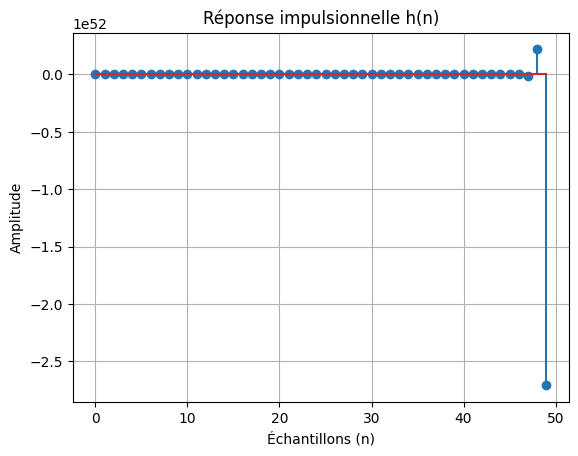

In [15]:
# Initialisation de la réponse impulsionnelle
response = np.zeros(50)

# Impulsion à l'indice 0
response[0] = b[0]

# Calcul de la réponse impulsionnelle en tenant compte des coefficients a et b
for i in range(1, len(response)):
    response[i] = np.dot(b, np.power(-a, i))

# Tracé de la réponse impulsionnelle
plt.stem(response)
plt.title("Réponse impulsionnelle h(n)")
plt.xlabel("Échantillons (n)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Coefficients b : [ 0.01020948  0.         -0.04083792  0.          0.06125688  0.
 -0.04083792  0.          0.01020948]
Coefficients a : [  1.          -4.56803686   9.95922498 -13.49912589  12.43979269
  -7.94997696   3.43760562  -0.92305481   0.1203896 ]


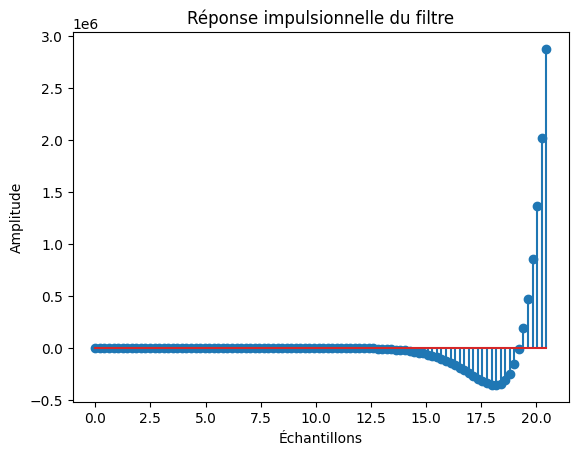

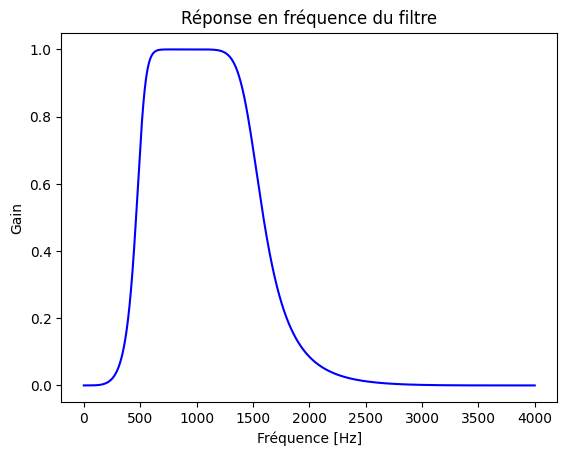

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Paramètres du filtre
order = 4
fs = 8000  # Fréquence d'échantillonnage en Hz
fc1 = 1000  # Fréquence de coupure 1 en Hz
fc2 = 3000  # Fréquence de coupure 2 en Hz

# Calcul des fréquences de coupure normalisées
f_c1_normalized = fc1 / fs
f_c2_normalized = fc2 / fs

# Calcul des coefficients du filtre Butterworth
b, a = signal.butter(order, [f_c1_normalized, f_c2_normalized], btype='bandpass', analog=False)

# Affichage des coefficients
print("Coefficients b :", b)
print("Coefficients a :", a)

# Réponse impulsionnelle
impulse_response = signal.impulse([b, a])
print(impulse_response)

# Tracé de la réponse impulsionnelle
plt.stem(impulse_response[0], impulse_response[1])
plt.title('Réponse impulsionnelle du filtre')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.show()

# Tracé de la fonction de transfert
w, h = signal.freqz(b, a, worN=8000)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Réponse en fréquence du filtre')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Gain')
plt.show()
